In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri artırma (Data Augmentation) için nesneleri oluştur
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    "C:\\Users\\aymis\\OneDrive\\Resimler\\Masaüstü\\dataset\\train",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(
    "C:\\Users\\aymis\\OneDrive\\Resimler\\Masaüstü\\dataset\\test",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')


Found 106 images belonging to 2 classes.
Found 106 images belonging to 2 classes.


In [22]:
model = Sequential()

from keras.layers import Input, Conv2D
from keras.models import Sequential

model = Sequential()
model.add(Input(shape=(64, 64, 3)))
model.add(Conv2D(32, (3, 3)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # İki sınıf olduğu için sigmoid

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [23]:
history = model.fit(
    train_set,
    steps_per_epoch=100,
    epochs=10,
    validation_data=test_set,
    validation_steps=25
)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4802 - loss: 0.6853 - val_accuracy: 0.6321 - val_loss: 0.5593
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7991 - loss: 0.5057 - val_accuracy: 0.9717 - val_loss: 0.2920
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9340 - loss: 0.2090 - val_accuracy: 0.9340 - val_loss: 0.1582
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9530 - loss: 0.1002 - val_accuracy: 0.9340 - val_loss: 0.1484
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9330 - loss: 0.1212 - val_accuracy: 0.8679 - val_loss: 0.4470
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9625 - loss: 0.1428 - val_accuracy: 0.9906 - val_loss: 0.0322
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8878 - loss: 0.2592 - val_accuracy: 0.9623 - val_loss: 0.0595
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9710 - loss: 0.0658 - val_accuracy: 

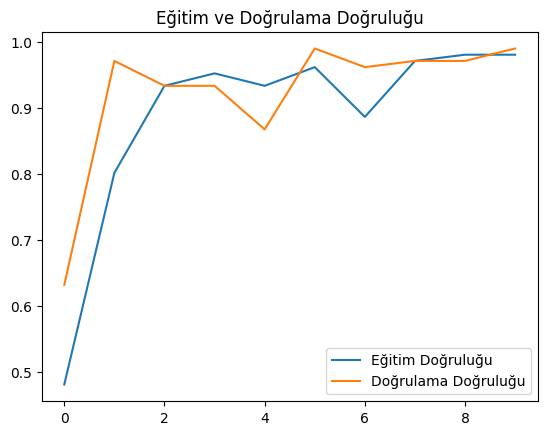

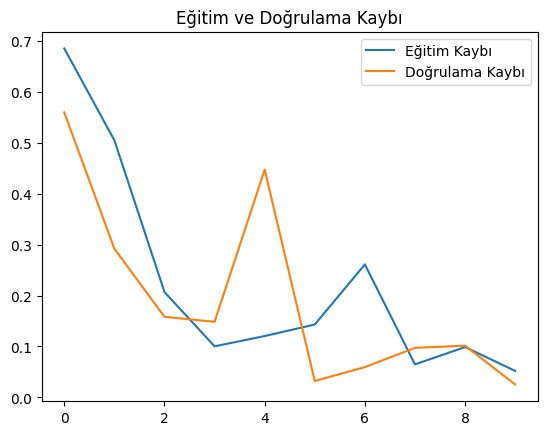

In [24]:
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend()
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.show()

plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.legend()
plt.title('Eğitim ve Doğrulama Kaybı')
plt.show()


In [25]:
model.save('my_model.keras')

In [16]:
history = model.fit(
    train_set,
    steps_per_epoch=train_set.samples // train_set.batch_size,
    epochs=10,
    validation_data=test_set,
    validation_steps=test_set.samples // test_set.batch_size
)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 368ms/step - accuracy: 1.0000 - loss: 4.6074e-04 - val_accuracy: 1.0000 - val_loss: 4.7683e-04
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 1.0000 - loss: 3.3119e-04 - val_accuracy: 1.0000 - val_loss: 8.2664e-04
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 276ms/step - accuracy: 1.0000 - loss: 2.2798e-04 - val_accuracy: 1.0000 - val_loss: 6.6009e-04
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 1.0000 - loss: 6.0245e-04 - val_accuracy: 1.0000 - val_loss: 5.9347e-04
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 330ms/step - accuracy: 1.0000 - loss: 2.2221e-04 - val_accuracy: 1.0000 - val_loss: 3.1008e-04
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 3.4423e-04
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step - accuracy: 1.0000 - loss: 1.6758e-04 - val_accuracy: 1.0000 - val_loss: 1.7266e-04
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step - accuracy: 1.00

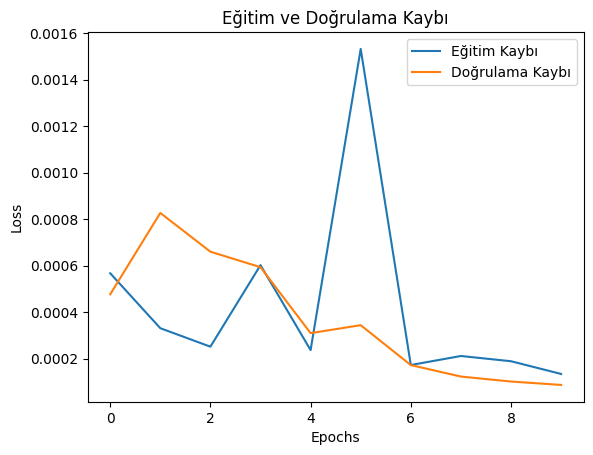

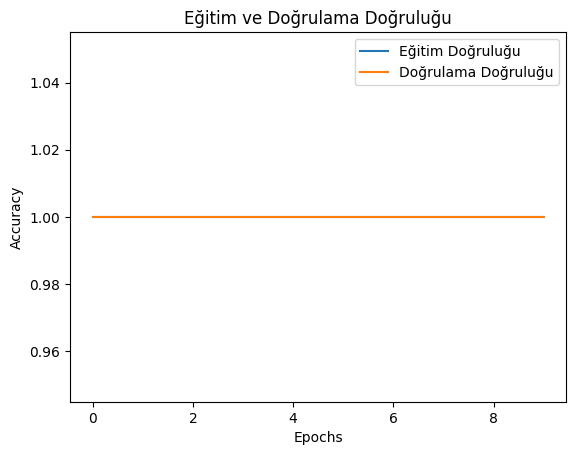

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [18]:
loss, accuracy = model.evaluate(test_set, steps=test_set.samples // test_set.batch_size)
print(f"Test Kaybı: {loss}")
print(f"Test Doğruluğu: {accuracy}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 1.0000 - loss: 9.0736e-05
Test Kaybı: 7.809533417457715e-05
Test Doğruluğu: 1.0


In [19]:
model.save('my_model.keras')
